# wav2wavetable demo notebook

In [36]:
# import code dependencies
%load_ext autoreload
%autoreload 2

import librosa
from getsinglecycles import autocorr, plot_peaks_01, plot_peaks_02

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First load up a wave file called `Solid_RAW_uncut.wav`

In [33]:
input_audio_path="./Solid_RAW_uncut.wav"
input_sig, sr = librosa.load(input_audio_path, sr=None, mono=False)

# If stereo grab left channel
if input_sig.shape[0] != 1:
    input_sig = input_sig[0, :]

print("sample rate: {}".format(sr))

sample rate: 192000


Compute autocorrelation function & plot peaks in the first 10,000 samples. Plot peaks basked on width & prominence. Prominence wins with the "cleanest" results. 

----
In the plot below, the first row plots are the autocorrelation function (and peaks) these offsets are plotted in the second row on the ORIGINAL waveform.

Found peaks2 @ the following sample offsets: [1745 3489 5233 6977 8720]


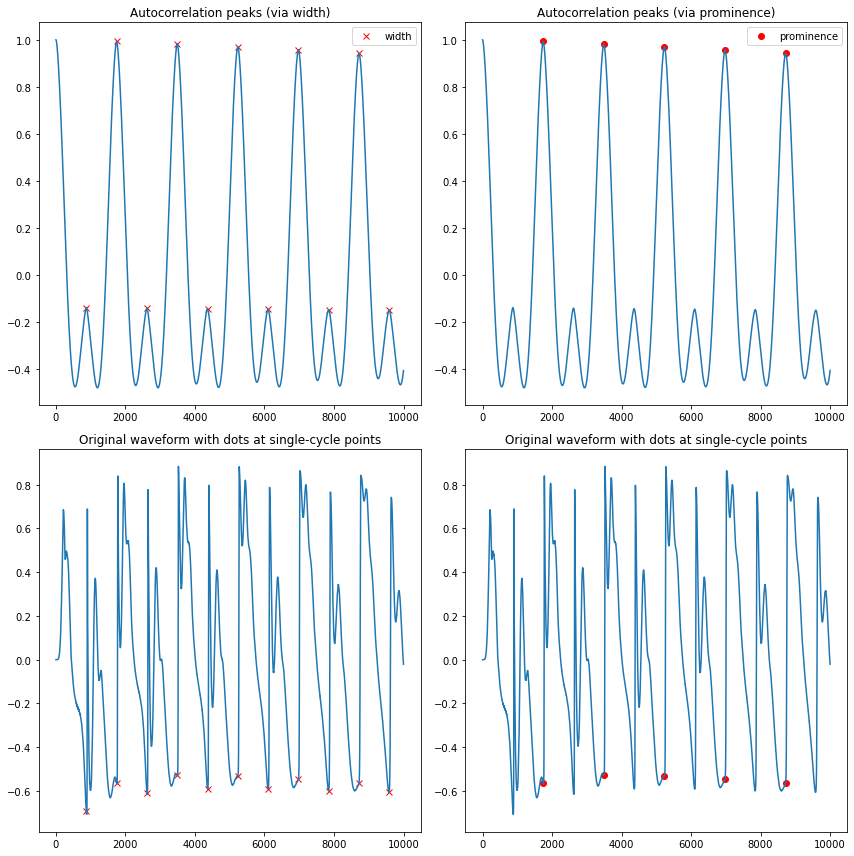

In [34]:
acf = autocorr(sig)
plot_peaks_02(input_sig, acf)

In [40]:
# Snip original file at acf peak points, which are the principal periodicities in the original WAV
acf_peaks, _ = find_peaks(acf, prominence=1)

start_index = 0
basename, ext = os.path.splitext(os.path.basename(input_audio_path))
for end_index in acf_peaks:
    single_cycle_file_name = basename + "_" + str(start_index).zfill(5) + "_" + str(end_index).zfill(5) + ext
    sf.write(single_cycle_file_name,
             sig[start_index:end_index],
             sr,
             'PCM_16')
    print("wrote a file => {}  of length: {} samples ".format(single_cycle_file_name, end_index - start_index))
    start_index = end_index

wrote a file => Solid_RAW_uncut_00000_01745.wav  of length: 1745 samples 
wrote a file => Solid_RAW_uncut_01745_03489.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_03489_05233.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_05233_06977.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_06977_08720.wav  of length: 1743 samples 
wrote a file => Solid_RAW_uncut_08720_10463.wav  of length: 1743 samples 
wrote a file => Solid_RAW_uncut_10463_12207.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_12207_13950.wav  of length: 1743 samples 
wrote a file => Solid_RAW_uncut_13950_15693.wav  of length: 1743 samples 
wrote a file => Solid_RAW_uncut_15693_17437.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_17437_19180.wav  of length: 1743 samples 
wrote a file => Solid_RAW_uncut_19180_20924.wav  of length: 1744 samples 
wrote a file => Solid_RAW_uncut_20924_22669.wav  of length: 1745 samples 
wrote a file => Solid_RAW_uncut_22669_